In [15]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

In [29]:
import kmeans_combined_revised, simulatedData, time, kmeans_mc_numba, kmeans_Numba_revised, kmeans_mc
from kmeans_combined_revised import kmeansplusplus, kmeansparallel, kmeans
from kmeans_mc_numba import kmeansparallel_mc_numba, kmeans_mc_numba
from simulatedData import generate_data

In [30]:
# test on simulated data
# set number of clusters
k=6
# set variance for simulation
R = 100
# set dimensions
d=15
# set number of points to generate
npoints = 10000
# generate data
sim_data = generate_data(k,R,d, npoints)

### Timings

In [7]:
# set parameters
k = 6
l=k*2
d = 15
r = 1

In [12]:
sim_data.shape

(10000, 15)

#### Timing selecting centers and clustering

**Kmeans++:**

In [32]:
%timeit kmeans(sim_data, kmeansplusplus(sim_data, k, d), k, d)

1 loop, best of 3: 29.5 s per loop


**Kmeans||:**

In [34]:
%timeit kmeans(sim_data, kmeansparallel(sim_data, k, l, d, r), k, d)

1 loop, best of 3: 39.6 s per loop


**Kmeans||with Numba:**

In [22]:
%timeit kmeans_Numba_revised.kmeans(sim_data, kmeans_Numba_revised.kmeansparallel(sim_data, k, l, d, r), k, d)

1 loop, best of 3: 25.2 s per loop


**Kmeans||with MC:**

In [31]:
%timeit kmeans_mc.kmeans(sim_data, kmeans_mc.kmeansparallel(sim_data, k, l, d, r), k, d)

1 loop, best of 3: 57.9 s per loop


**Kmeans||with MC and Numba:**

In [23]:
%timeit kmeans_mc_numba(sim_data, kmeansparallel_mc_numba(sim_data, k, l, d, r), k, d)

1 loop, best of 3: 34.5 s per loop


### Clustering

In [33]:
sim_data_k6 = generate_data(k=6, var=100, dim=2, npoints=10000)

In [34]:
k = 6
l=k*2
d = 2
r = 1

**Kmeans++ clustering:**

In [7]:
sim_plus = kmeans(sim_data_k6, kmeansplusplus(sim_data_k6, k, d), k, d)

In [8]:
x_plus = sim_plus[0][:,0]
y_plus = sim_plus[0][:,1]
labels_plus = sim_plus[1]

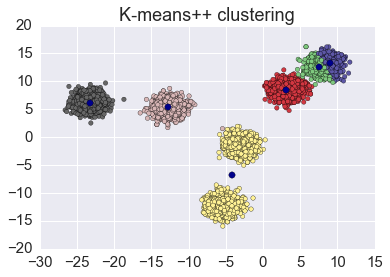

In [9]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=labels_plus, cmap='Accent')
plt.scatter(x_plus, y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

**Kmeans|| clustering:**

In [10]:
sim_para = kmeans(sim_data_k6,kmeansparallel(sim_data_k6, k, l, d, r),k,d)

In [11]:
x_para = sim_para[0][:,0]
y_para = sim_para[0][:,1]
labels_para = sim_para[1]

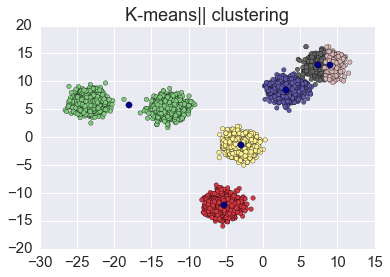

In [12]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=labels_para, cmap='Accent')
plt.scatter(x_para, y_para, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

**Optimization: Numba**

In [35]:
sim_numba=kmeans_Numba_revised.kmeans(sim_data_k6, kmeans_Numba_revised.kmeansparallel(sim_data_k6, k, l, d, r), k, d)

In [7]:
numba_x= sim_numba[0][:,0]
numba_y= sim_numba[0][:,1]
numba_labels= sim_numba[1]

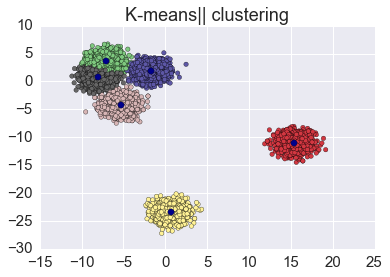

In [8]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=mc_numba_labels, cmap='Accent')
plt.scatter(numba_x, numba_y, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

**Optimization: MC**

In [36]:
sim_mc=kmeans_mc.kmeans(sim_data_k6, kmeans_mc.kmeansparallel(sim_data_k6, k, l, d, r), k, d)

In [37]:
mc_x= sim_mc[0][:,0]
mc_y= sim_mc[0][:,1]
mc_labels= sim_mc[1]

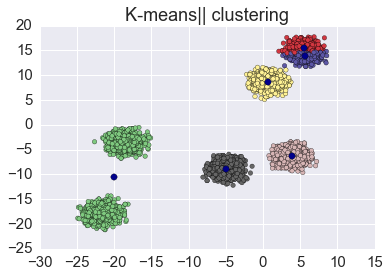

In [38]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=mc_labels, cmap='Accent')
plt.scatter(mc_x, mc_y, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

**Optimization MC and Numba**

In [39]:
sim_mc_numba=kmeans_mc_numba(sim_data_k6, kmeansparallel_mc_numba(sim_data_k6, k, l, d, r), k, d)

In [40]:
mc_numba_x= sim_mc_numba[0][:,0]
mc_numba_y= sim_mc_numba[0][:,1]
mc_numba_labels= sim_mc_numba[1]

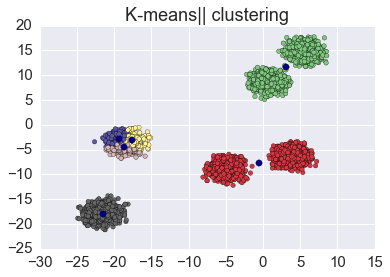

In [41]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=mc_numba_labels, cmap='Accent')
plt.scatter(mc_numba_x, mc_numba_y, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

### old stuff from real data set

In [9]:
real_data=pd.read_csv('NYBoroughs.csv')

In [11]:
real_data.drop(real_data.columns[[0,1]], axis=1, inplace=True)

In [23]:
real_data=np.array(real_data)
d=real_data.shape[1]
n=real_data.shape[0]
k=3

**Kmeans++ clustering**

In [17]:
res_plus = kmeans(real_data,kmeansplusplus(real_data,k,d),k, d)

In [18]:
res_x_plus = res_plus[0][:,0]
res_y_plus = res_plus[0][:,1]
res_labels_plus = res_plus[1]

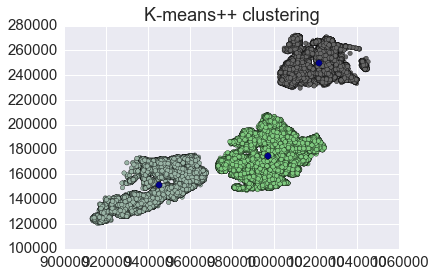

In [19]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_plus, cmap='Accent')
plt.scatter(res_x_plus, res_y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

**Kmeans|| clustering**

In [24]:
#kmeans||parameters
l=8
r=1

In [25]:
res_para = kmeans(real_data,kmeansparallel(real_data, k, l, d, r),k,d)

In [26]:
res_x_para = res_para[0][:,0]
res_y_para = res_para[0][:,1]
res_labels_para = res_para[1]

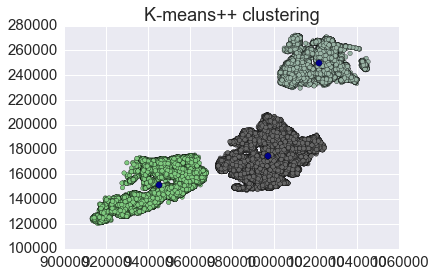

In [27]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_para, cmap='Accent')
plt.scatter(res_x_para, res_y_para, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

**Optimization:Numba**

In [43]:
res_numba=kmeans_Numba_revised.kmeans(real_data, kmeans_Numba_revised.kmeansparallel(real_data, k, l, d, r), k, d)

In [44]:
res_x_numba = res_numba[0][:,0]
res_y_numba = res_numba[0][:,1]
res_labels_numba = res_numba[1]

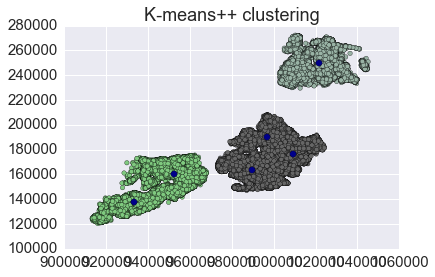

In [45]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_para, cmap='Accent')
plt.scatter(res_x_numba, res_y_numba, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

**Optimization:MC**

In [ ]:
res_mc=kmeans_mc.kmeans(real_data, kmeans_mc.kmeansparallel(real_data, k, l, d, r), k, d)

In [ ]:
res_x_mc = res_mc[0][:,0]
res_y_mc = res_mc[0][:,1]
res_labels_mc= res_mc[1]

In [ ]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_mc, cmap='Accent')
plt.scatter(res_x_mc, res_y_mc, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

**Optimization:MC and Numba**

In [ ]:
res_mc_numba=kmeans_mc_numba(real_data, kmeansparallel_mc_numba(real_data, k, l, d, r), k, d)

In [ ]:
res_x_mc_numba = res_mc_numba[0][:,0]
res_y_mc_numba = res_mc_numba[0][:,1]
res_labels_mc_numba= res_mc_numba[1]

In [ ]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_mc_numba, cmap='Accent')
plt.scatter(res_x_mc_numba, res_y_mc_numba, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass